In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# Sample data
df = pd.read_csv('./ministry_of_defense_v2.csv')

# Data Exploratory Analysis
# print(df.columns)
# print(df.info)
# print(df.head(5))
# print(df['SCOID'].isnull())
# print(df['DATE'].isnull())

# Remove NaN
print(len(df))
df = df.dropna(subset=['DATE', 'ISO'])
print(len(df))

# Change datatype
df['DATE'] = df['DATE'].astype(str)
df['ISO'] = df['ISO'].astype(str)


996
109


In [3]:
print(df['ISO'])

0      AFG
1      ALB
2      ARE
3      ARG
4      ARM
      ... 
104    UKR
105    URY
106    USA
107    VNM
108    ZAF
Name: ISO, Length: 109, dtype: object


In [4]:
L_DATE = df['DATE'].tolist()
L_YEAR = [int(value[:4]) for value in L_DATE]
L_ISO = df['ISO'].tolist()
print(L_YEAR)
print(L_ISO)

[2014, 2010, 2014, 2008, 2017, 2001, 2013, 2018, 2014, 2010, 2017, 2002, 2016, 2005, 2015, 2001, 2012, 2016, 2000, 2019, 2011, 2017, 2017, 2011, 2006, 2021, 2011, 2014, 2014, 2013, 2008, 2018, 2013, 2010, 2009, 2006, 2013, 2020, 1999, 2018, 2015, 2013, 2008, 2004, 2015, 2003, 2002, 2013, 2017, 2010, 2011, 2021, 2014, 2010, 2017, 2019, 2011, 2008, 2015, 2012, 2011, 2016, 2014, 2018, 2016, 2021, 2013, 2017, 2016, 2019, 2017, 2010, 2015, 2011, 2003, 2023, 2010, 2013, 2013, 2021, 2012, 2009, 2013, 2015, 2014, 2013, 2000, 2015, 2011, 2016, 2000, 2016, 2016, 2009, 2013, 2010, 2015, 2013, 2003, 2018, 2018, 2012, 2011, 2016, 2015, 2013, 1988, 2017, 2012]
['AFG', 'ALB', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BEL', 'BGR', 'BIH', 'BLR', 'BOL', 'BRA', 'BWA', 'CAN', 'CHE', 'CHL', 'CHN', 'COD', 'COL', 'CUB', 'CYP', 'CZE', 'DEU', 'DJI', 'DNK', 'ECU', 'EGY', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'GBR', 'GEO', 'GHA', 'GRC', 'GTM', 'HRV', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'ISR', 'ITA', 'JOR', '

In [5]:
df_analysis = pd.DataFrame({'country':L_ISO, 'year':L_YEAR})
df_analysis

,country,year
0,AFG,2014
1,ALB,2010
2,ARE,2014
3,ARG,2008
4,ARM,2017
...,...,...
104,UKR,2015
105,URY,2013
106,USA,1988
107,VNM,2017


In [6]:
df_analysis['country'] = df_analysis['country'].astype(str)
# Define full year range (e.g., 2011 to 2020)
year_range = list(range(min(L_YEAR), max(L_YEAR) + 1))
grouped = {}
for year in year_range:
    grouped[year] = []

y_axis_lengths = []
for year in year_range:
    countries_list = df_analysis.loc[df_analysis['year'] == year]['country'].tolist()
    grouped[year] = countries_list 
    y_axis_lengths.append(len(countries_list))
print(grouped)
print(y_axis_lengths)

{1988: ['USA'], 1989: [], 1990: [], 1991: [], 1992: [], 1993: [], 1994: [], 1995: [], 1996: [], 1997: [], 1998: [], 1999: ['GRC'], 2000: ['CHN', 'RUS', 'SGP'], 2001: ['AUS', 'CAN'], 2002: ['BLR', 'ISR'], 2003: ['IRN', 'NOR', 'TJK'], 2004: ['IND'], 2005: ['BRA'], 2006: ['DEU', 'GBR'], 2007: [], 2008: ['ARG', 'EST', 'IDN', 'LTU'], 2009: ['FRA', 'PRK', 'SRB'], 2010: ['ALB', 'BGR', 'FJI', 'JPN', 'KOR', 'MYS', 'NZL', 'SVN'], 2011: ['COL', 'CZE', 'DNK', 'KAZ', 'LKA', 'MAR', 'NLD', 'SAU', 'TWN'], 2012: ['CHE', 'LVA', 'POL', 'TUR', 'ZAF'], 2013: ['AUT', 'ESP', 'FIN', 'GEO', 'HUN', 'ITA', 'MNE', 'PER', 'PHL', 'PRT', 'ROU', 'SVK', 'THA', 'URY'], 2014: ['AFG', 'ARE', 'BEL', 'ECU', 'EGY', 'KHM', 'MEX', 'QAT'], 2015: ['BWA', 'HRV', 'IRL', 'LUX', 'NGA', 'PRY', 'RWA', 'SWE', 'UKR'], 2016: ['BOL', 'CHL', 'MDA', 'MLT', 'MOZ', 'SEN', 'SLE', 'SLV', 'UGA'], 2017: ['ARM', 'BIH', 'CUB', 'CYP', 'JOR', 'KWT', 'MNG', 'MWI', 'VNM'], 2018: ['AZE', 'ETH', 'GTM', 'MKD', 'TKM', 'TUN'], 2019: ['COD', 'LBN', 'MRT'], 

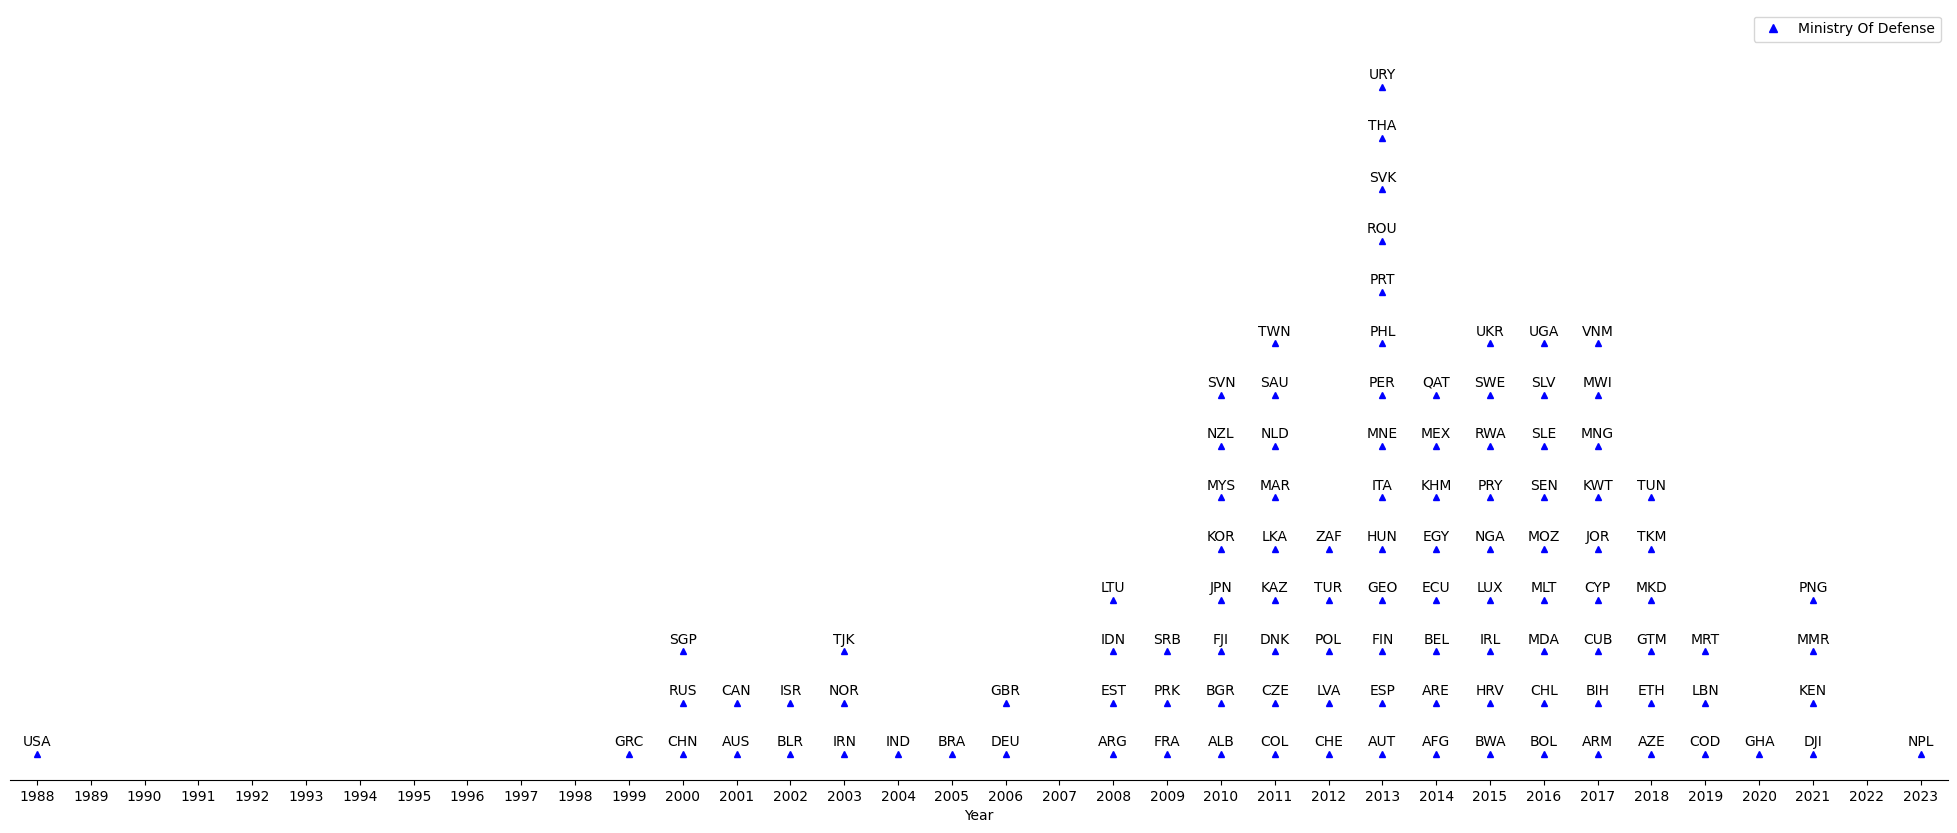

In [8]:
# Define spacing
spacing = 1  # Increase this to widen x-axis spacing
x_positions = [i * spacing for i in range(len(year_range))]

# Plot
fig, ax = plt.subplots(figsize=(25, 10))

for x, year in zip(x_positions, year_range):
    countries = grouped[year]
    
    # Always draw vertical line
    # Original graph
    # ax.vlines(x, 0, max(1, len(countries)-1), color='gray', linewidth=1)
    # Graph that matches old graph's look
    # ax.vlines(x, -2, 13, color='gray', linewidth=1)

    
    # Draw dots & labels if countries exist
    for i, country in enumerate(countries):
        ax.plot(x, i, '^', color='blue', markersize=5)
        ax.text(x, i + 0.1, country, ha='center', va='bottom', fontsize=10)

# Set axis labels and ticks
ax.set_xticks(x_positions)
ax.set_xticklabels(year_range, fontsize=10)
ax.set_xlim((min(x_positions) - 0.5), (max(x_positions) + 0.5))
ax.set_ylim(-0.5, max(y_axis_lengths) + 0.5)
ax.set_xlabel('Year', fontsize=10)
# ax.set_title('Countries Establishing Ministry of Defense by Year', fontsize=15, y = 0.95)
# plt.suptitle('(from google sheet ministry_of_defense_v2)', fontsize=12, y=0.84)

# Hide y-axis
ax.get_yaxis().set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Legend to match screenshot
ax.plot([], [], '^', color='blue', label='Ministry Of Defense')
ax.legend(loc='upper right', fontsize=10)

#plt.tight_layout()
plt.show()

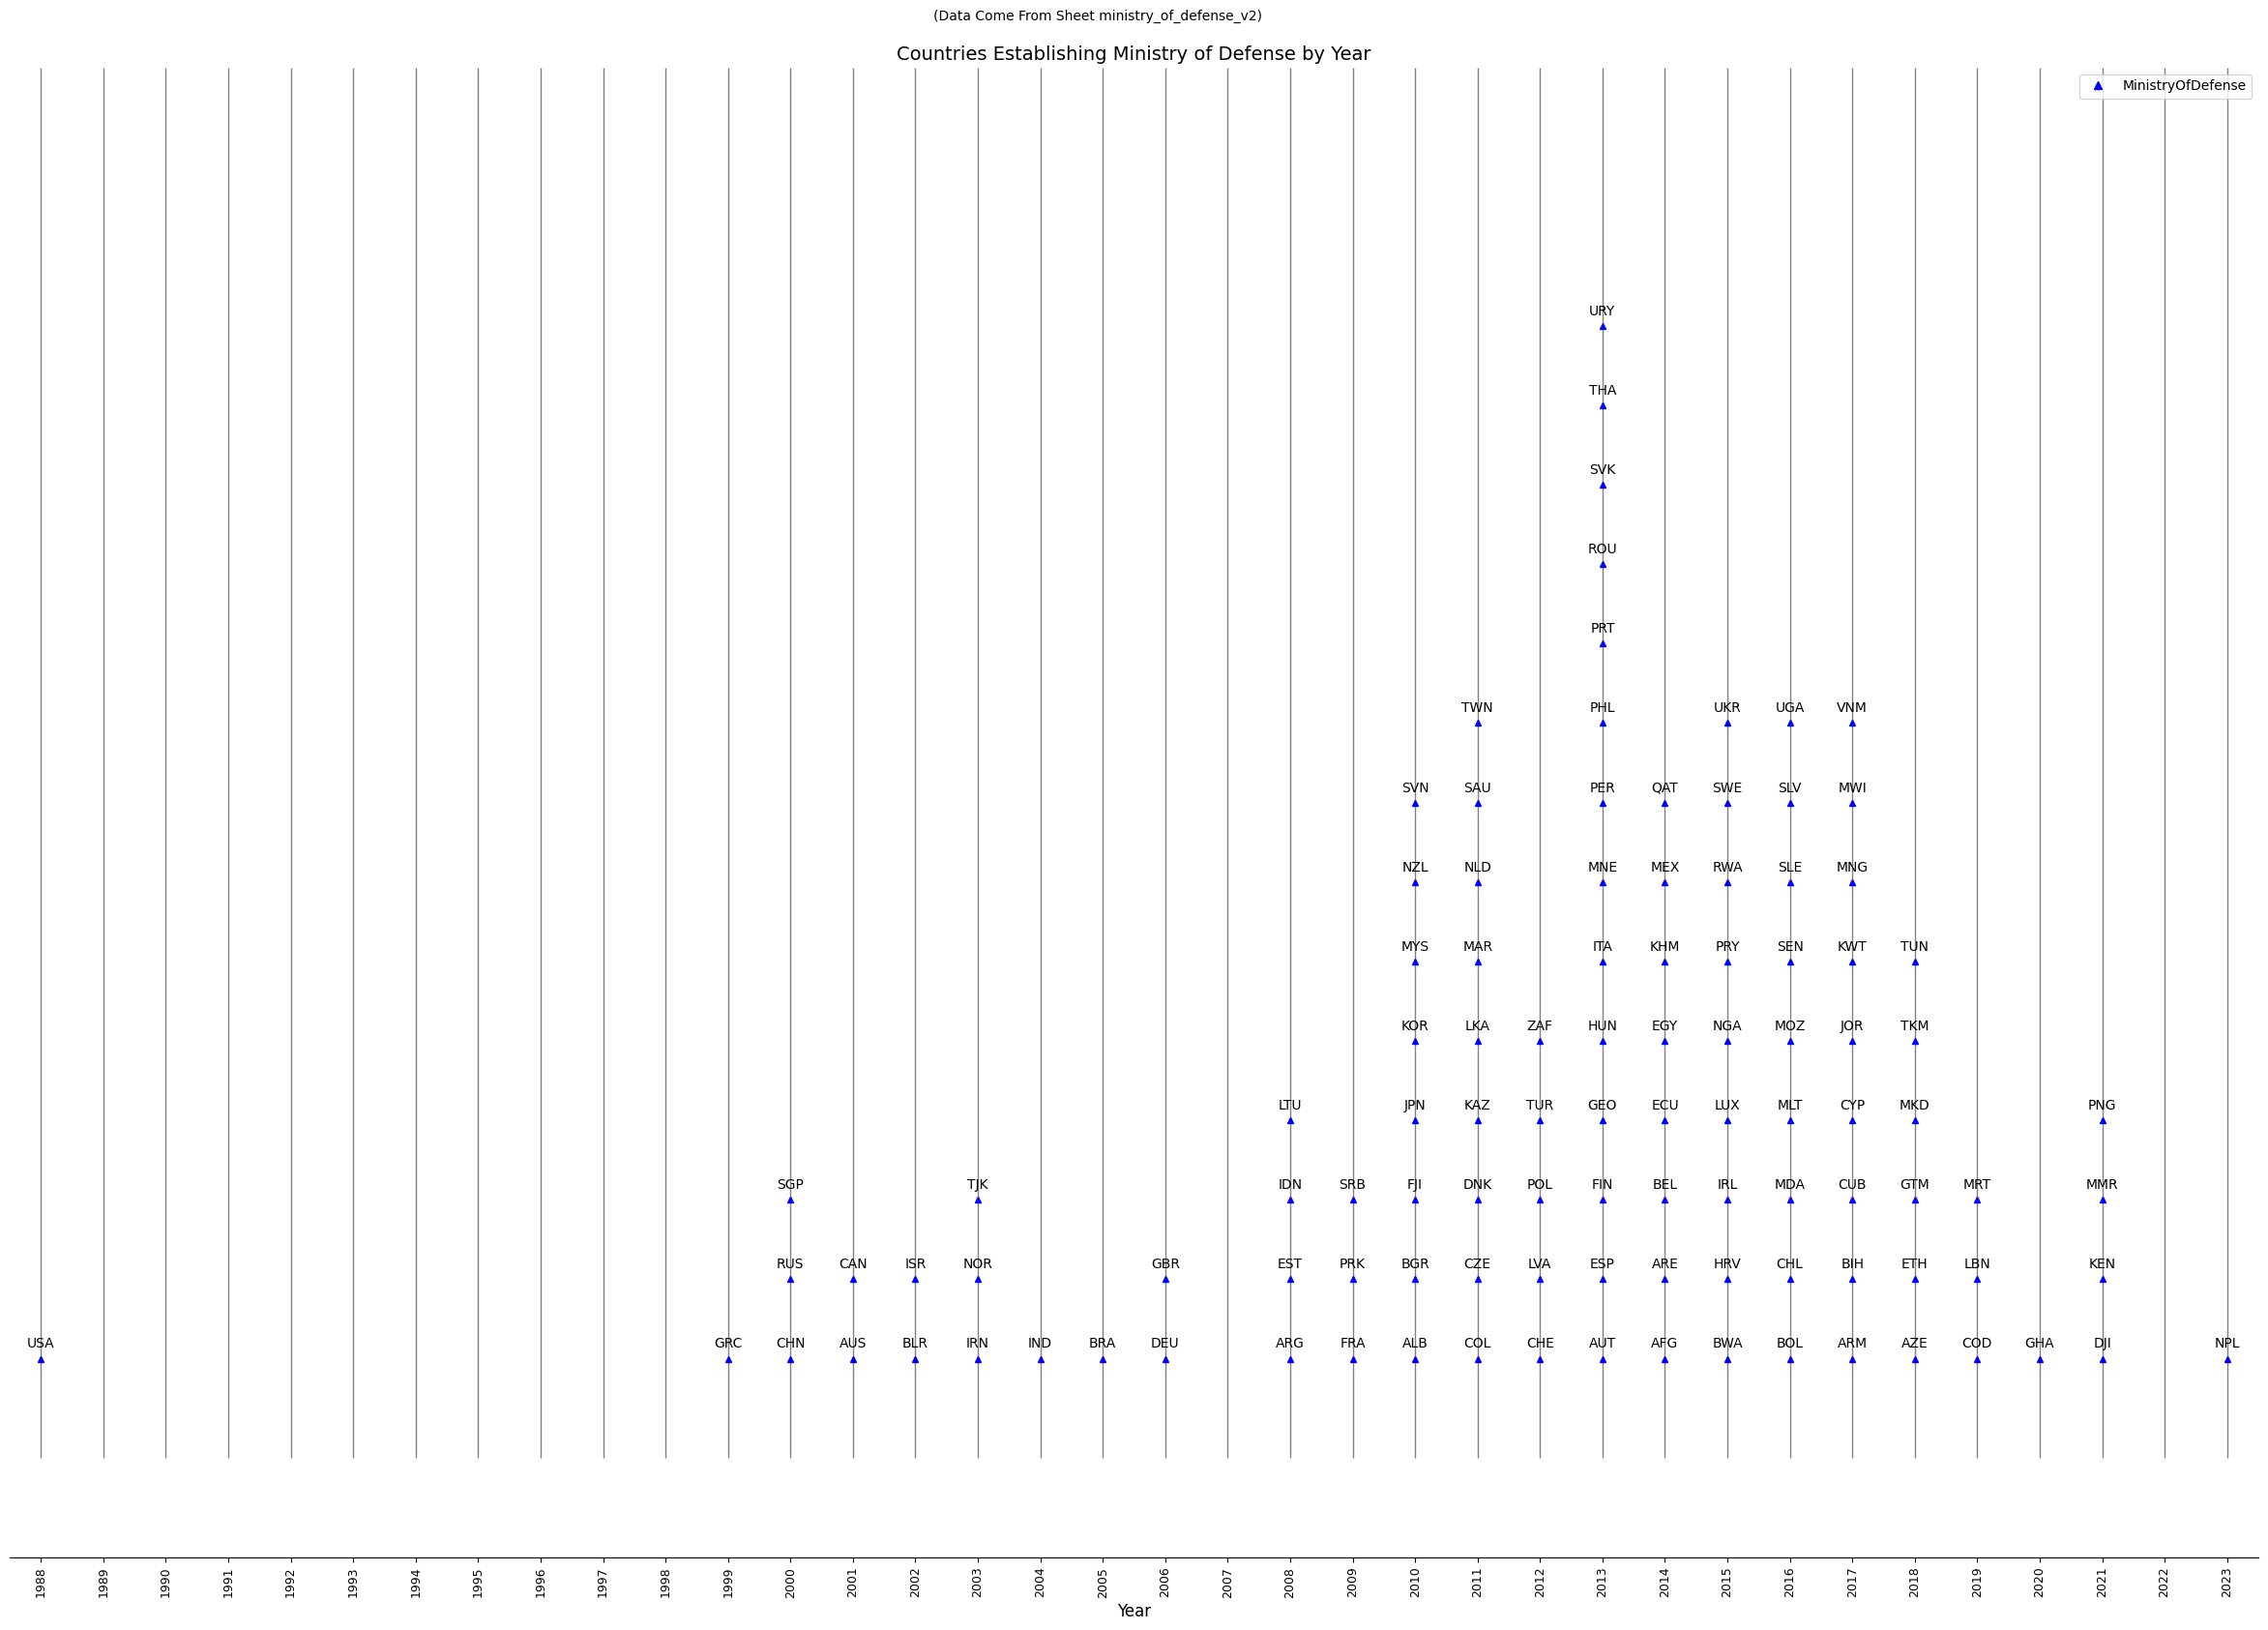

In [45]:
# Define spacing
spacing = 1
x_positions = [i * spacing for i in range(len(year_range))]

# Plot
fig, ax = plt.subplots(figsize=(30, 20))

for x, year in zip(x_positions, year_range):
    countries = grouped[year]

    # Match the old graph's look: full-length vertical lines
    ax.vlines(x, -1, 13, color='gray', linewidth=1)

    # Draw dots & labels
    for i, country in enumerate(countries):
        ax.plot(x, 0.8 * (i), '^', color='blue', markersize=5)  # Use triangle markers like in image
        ax.text(x, 0.8 * (i + 0.1), country, ha='center', va='bottom', fontsize=10)

# Set axis labels and ticks
ax.set_xticks(x_positions)
ax.set_xticklabels(year_range, fontsize=9, rotation=90)  # Rotate year labels for better fit
ax.set_xlim((min(x_positions) - 0.5), (max(x_positions) + 0.5))
ax.set_ylim(-2, 13)  # Match the vertical line range exactly
ax.set_xlabel('Year', fontsize=12)
ax.set_title('Countries Establishing Ministry of Defense by Year', fontsize=14)
plt.suptitle('(Data Come From Sheet ministry_of_defense_v2)', fontsize=10, y=0.91)

# Legend to match screenshot
ax.plot([], [], '^', color='blue', label='MinistryOfDefense')
ax.legend(loc='upper right', fontsize=10)

# Hide y-axis
ax.get_yaxis().set_visible(False)
for spine in ['left', 'right', 'top']:
    ax.spines[spine].set_visible(False)

plt.show()
